In [56]:
library(ggplot2)
library(leaflet)
library(mapproj)
library(proj4)
library(geoR)
library(dplyr)
library(fields)
library(readr)
library(IRdisplay)
library(nlme)
library(mgcv)

theme_set(theme_light())

# Fitting semivariograms/covariance functions with simulated data

grf: simulation(s) on randomly chosen locations with  100  points
grf: process with  1  covariance structure(s)
grf: nugget effect is: tausq= 0.05 
grf: covariance model 1 is: matern(sigmasq=0.5, phi=1, kappa = 1)
grf: decomposition algorithm used is:  cholesky 
grf: End of simulation procedure. Number of realizations: 1 
variog: computing omnidirectional variogram
variog: computing omnidirectional variogram


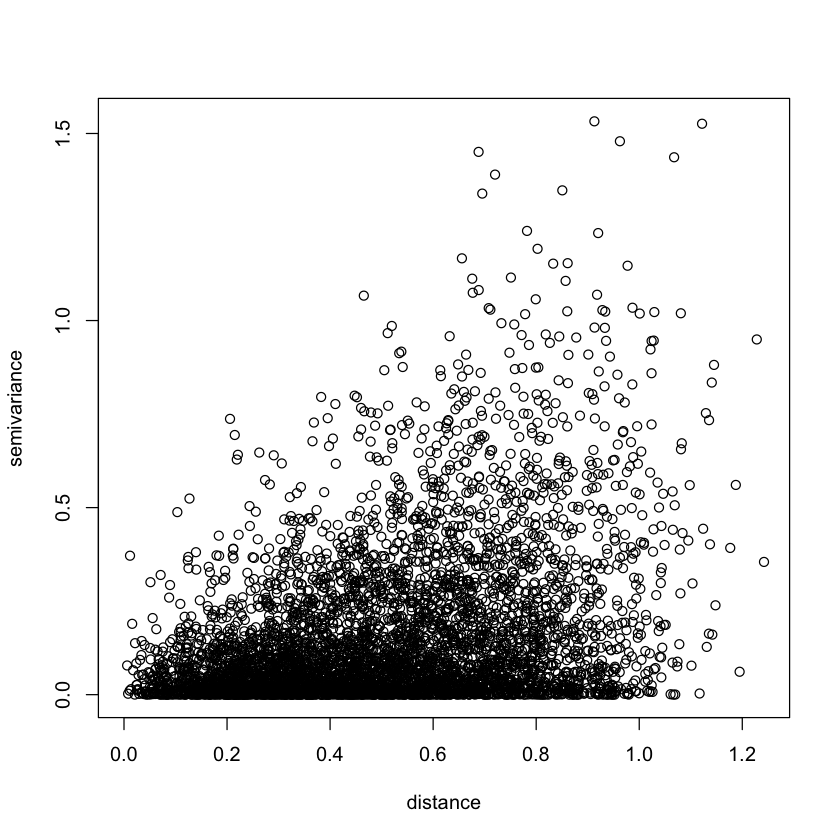

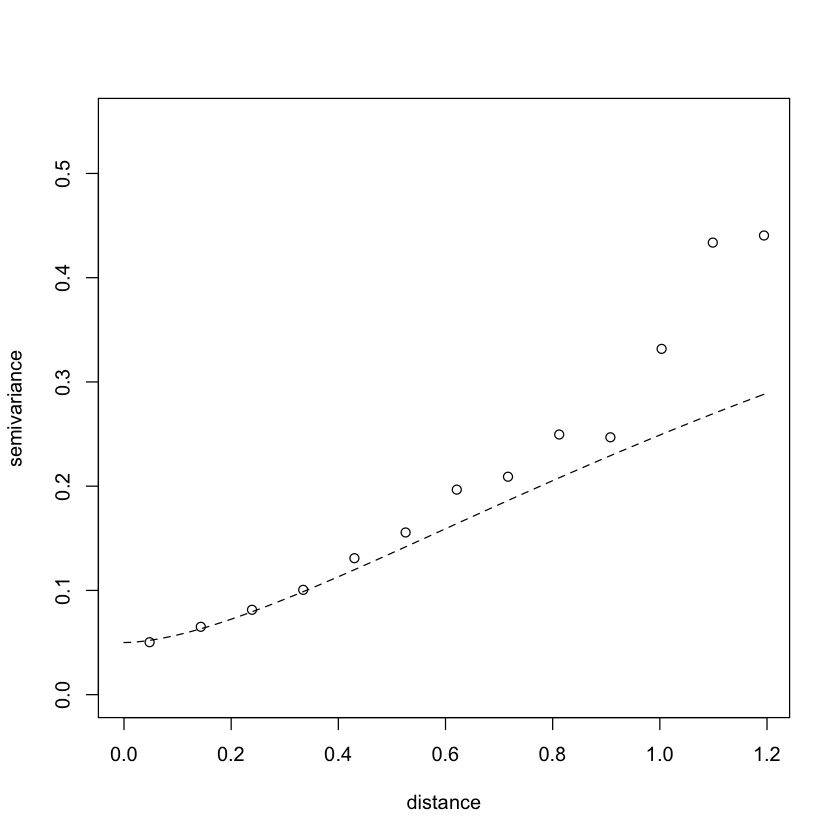

In [2]:
# 1a
set.seed(2019)

# kappa=1, nugget=0.05, sill=0.55, range=1
matern_sim = grf(100, kappa=1, nugget=0.05, cov.pars=c(0.5, 1))
cloud = variog(matern_sim, option='cloud')
plot(cloud)
plot(matern_sim)

The eyeballed estimates matches the simulated data except for the sill. It doesn't seem like to be 0.55 in this empirical variogram.

In [3]:
get_params = function(model) {
    list(summary(model)$estimated.pars, summary(model)$sum.of.squares)
}

In [4]:
get_params2 = function(model) {
    list(model$parameters.summary, model$AIC)
}

variog: computing omnidirectional variogram
variofit: covariance model used is matern 
variofit: weights used: equal 
variofit: minimisation function used: optim 
variofit: covariance model used is matern 
variofit: weights used: cressie 
variofit: minimisation function used: optim 
---------------------------------------------------------------
likfit: likelihood maximisation using the function optim.
likfit: Use control() to pass additional
         arguments for the maximisation function.
        For further details see documentation for optim.
likfit: It is highly advisable to run this function several
        times with different initial values for the parameters.
likfit: WARNING: This step can be time demanding!
---------------------------------------------------------------
likfit: end of numerical maximisation.
---------------------------------------------------------------
likfit: likelihood maximisation using the function optim.
likfit: Use control() to pass additional
      

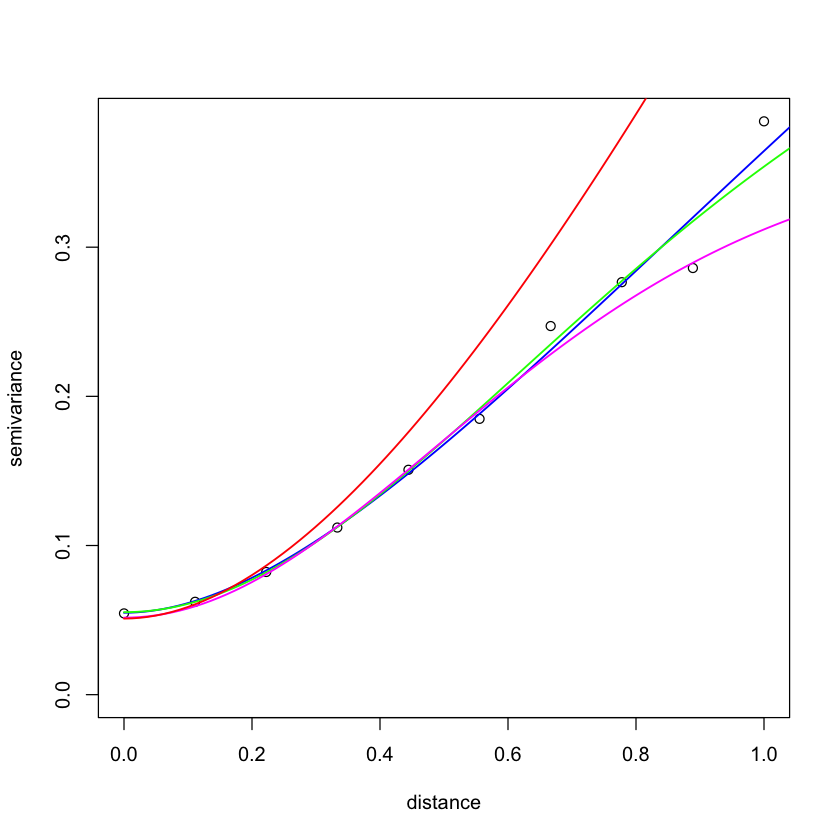

In [5]:
# 1b
# Matern

vario = variog(matern_sim, uvec=seq(0,1,l=10), option='bin', estimator.type='modulus')

matern_ols = variofit(vario, ini.cov.pars=c(0.5,1), nugget=0.05, kappa=1, fix.kappa=F, 
                      fix.nugget=F, cov.model='matern', weights='equal')
matern_wls = variofit(vario, ini.cov.pars=c(0.5,1), nugget=0.05, kappa=1, fix.kappa=F, 
                      fix.nugget=F, cov.model='matern', weights='cressie')
matern_ml = likfit(matern_sim, ini.cov.pars=c(0.5,1), nugget=0.05, kappa=1, fix.kappa=F, 
                   fix.nugget=F, cov.model='matern', lik.method='ML')
matern_reml = likfit(matern_sim, ini.cov.pars=c(0.5,1), nugget=0.05, kappa=1, fix.kappa=F, 
                     fix.nugget=F, cov.model='matern', lik.method='REML')
plot(vario)
lines(matern_ols, col='blue', lwd=1.5)
lines(matern_wls, col='green', lwd=1.5)
lines(matern_ml, col='magenta', lwd=1.5)
lines(matern_reml, col='red', lwd=1.5)

variofit: covariance model used is gaussian 
variofit: weights used: equal 
variofit: minimisation function used: optim 
variofit: covariance model used is gaussian 
variofit: weights used: cressie 
variofit: minimisation function used: optim 
kappa not used for the gaussian correlation function
---------------------------------------------------------------
likfit: likelihood maximisation using the function optim.
likfit: Use control() to pass additional
         arguments for the maximisation function.
        For further details see documentation for optim.
likfit: It is highly advisable to run this function several
        times with different initial values for the parameters.
likfit: WARNING: This step can be time demanding!
---------------------------------------------------------------
likfit: end of numerical maximisation.
kappa not used for the gaussian correlation function
---------------------------------------------------------------
likfit: likelihood maximisation using t

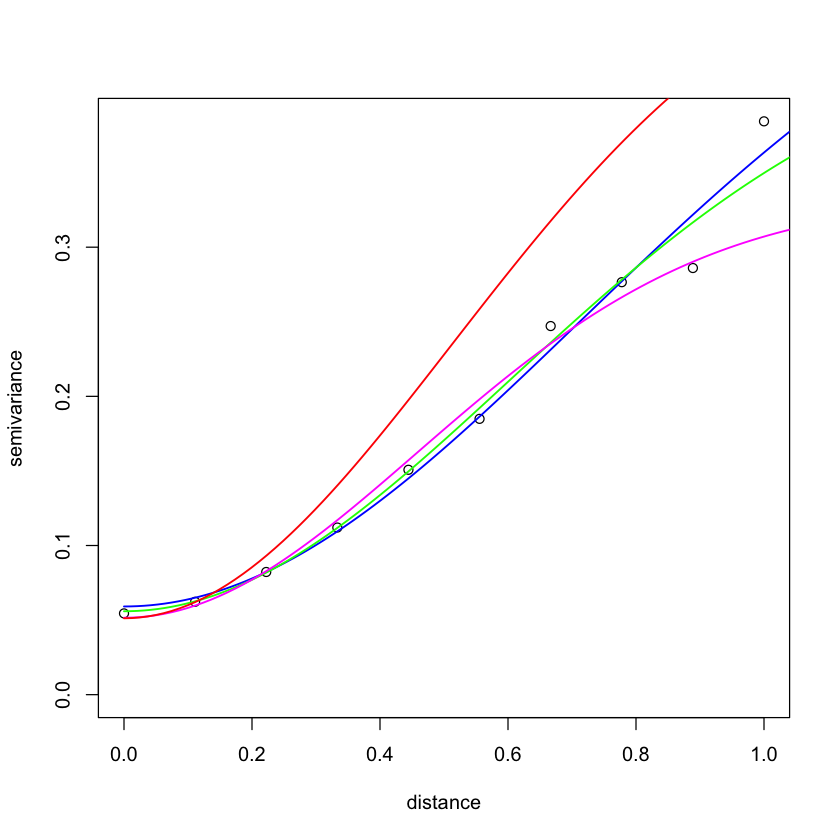

In [6]:
# Guassian

gaussian_ols = variofit(vario, ini.cov.pars=c(0.5,1), nugget=0.05,   
                      fix.nugget=F, cov.model='gaussian', weights='equal')
gaussian_wls = variofit(vario, ini.cov.pars=c(0.5,1), nugget=0.05,   
                      fix.nugget=F, cov.model='gaussian', weights='cressie')
gaussian_ml = likfit(matern_sim, ini.cov.pars=c(0.5,1), nugget=0.05,   
                   fix.nugget=F, cov.model='gaussian', lik.method='ML')
gaussian_reml = likfit(matern_sim, ini.cov.pars=c(0.5,1), nugget=0.05,   
                     fix.nugget=F, cov.model='gaussian', lik.method='REML')
plot(vario)
lines(gaussian_ols, col='blue', lwd=1.5)
lines(gaussian_wls, col='green', lwd=1.5)
lines(gaussian_ml, col='magenta', lwd=1.5)
lines(gaussian_reml, col='red', lwd=1.5)

In [7]:
get_params(matern_ols)
get_params(matern_wls)
get_params2(matern_ml)
get_params2(matern_reml)

[[1]]
     tausq    sigmasq        phi      kappa 
0.05491648 0.98457677 0.94527535 1.36947416 

[[2]]
      value 
0.001826949

[[1]]
     tausq    sigmasq        phi      kappa 
0.05529527 0.49524442 0.30808485 3.29810681 

[[2]]
   value 
6.973402

,status,values
beta,estimated,-0.6973
tausq,estimated,0.0516
sigmasq,estimated,0.3190
phi,estimated,0.1504
kappa,estimated,6.6400
psiA,fixed,0.0000
psiR,fixed,1.0000
lambda,fixed,1.0000


,status,values
beta,estimated,-0.6765
tausq,estimated,0.0510
sigmasq,estimated,3.2768
phi,estimated,1.6295
kappa,estimated,1.3578
psiA,fixed,0.0000
psiR,fixed,1.0000
lambda,fixed,1.0000


In [8]:
get_params(gaussian_ols)
get_params(gaussian_wls)
get_params2(gaussian_ml)
get_params2(gaussian_reml)

[[1]]
     tausq    sigmasq        phi 
0.05912852 0.48603294 1.00816785 

[[2]]
      value 
0.002038538

[[1]]
     tausq    sigmasq        phi 
0.05592291 0.39207836 0.85015133 

[[2]]
   value 
7.084829

,status,values
beta,estimated,-0.6978
tausq,estimated,0.0516
sigmasq,estimated,0.2816
phi,estimated,0.6483
kappa,fixed,0.5000
psiA,fixed,0.0000
psiR,fixed,1.0000
lambda,fixed,1.0000


,status,values
beta,estimated,-0.6992
tausq,estimated,0.0512
sigmasq,estimated,0.4658
phi,estimated,0.7239
kappa,fixed,0.5000
psiA,fixed,0.0000
psiR,fixed,1.0000
lambda,fixed,1.0000


In [9]:
data.frame(
    tao_sq = c(0.0549, 0.0553, 0.0516, 0.0510, 0.0591, 0.0559, 0.0516, 0.0512),
    phi = c(0.945, 0.308, 0.150, 1.63, 1.008, 0.850, 0.648, 0.724),
    sigma_sq = c(0.985, 0.495, 0.319, 3.277, 0.486, 0.392, 0.282, 0.466),
    kappa = c(1.37, 3.3, 6.64, 1.36, 'n/a', 'n/a', 'n/a', 'n/a'),
    fit = c(0.00183, 6.973, 26, 20.65, 0.00204, 7.085, 24.094, 19.689),
    type = rep(c('SSE', 'SSE', 'AIC', 'AIC'), times=2),
    row.names = c('matern_ols', 'matern_wls', 'matern_ml', 'matern_reml',
                     'gaussian_ols', 'gaussian_wls', 'gaussian_ml', 'gaussian_reml')
)

,tao_sq,phi,sigma_sq,kappa,fit,type
matern_ols,0.0549,0.945,0.985,1.37,0.00183,SSE
matern_wls,0.0553,0.308,0.495,3.3,6.97300,SSE
matern_ml,0.0516,0.150,0.319,6.64,26.00000,AIC
matern_reml,0.0510,1.630,3.277,1.36,20.65000,AIC
gaussian_ols,0.0591,1.008,0.486,n/a,0.00204,SSE
gaussian_wls,0.0559,0.850,0.392,n/a,7.08500,SSE
gaussian_ml,0.0516,0.648,0.282,n/a,24.09400,AIC
gaussian_reml,0.0512,0.724,0.466,n/a,19.68900,AIC


OLS is just the ordinary least square, which minimizes the square distance between the fitted lines and the binned variogram. WLS gives more weight to bins having more data so it's better than OLS. ML chooses the parameters that maximizes the likelihood of observed data. REML is an alternative and is based on maximizing the likelihood when the data are differences.

Gaussian seems to be the better fit across the board when compared with Matern. I will choose the Gaussian REML becuase of a lower AIC.

In [10]:
# 1c
matern_sim2 = grf(100, kappa=1, nugget=0.05, cov.pars=c(0.5, 1))
matern_sim3 = grf(100, kappa=1, nugget=0.05, cov.pars=c(0.5, 1))

grf: simulation(s) on randomly chosen locations with  100  points
grf: process with  1  covariance structure(s)
grf: nugget effect is: tausq= 0.05 
grf: covariance model 1 is: matern(sigmasq=0.5, phi=1, kappa = 1)
grf: decomposition algorithm used is:  cholesky 
grf: End of simulation procedure. Number of realizations: 1 
grf: simulation(s) on randomly chosen locations with  100  points
grf: process with  1  covariance structure(s)
grf: nugget effect is: tausq= 0.05 
grf: covariance model 1 is: matern(sigmasq=0.5, phi=1, kappa = 1)
grf: decomposition algorithm used is:  cholesky 
grf: End of simulation procedure. Number of realizations: 1 


In [11]:
gaussian_reml2 = likfit(matern_sim2, ini.cov.pars=c(0.5,1), nugget=0.05,   
                     fix.nugget=F, cov.model='gaussian', lik.method='REML')
gaussian_reml3 = likfit(matern_sim3, ini.cov.pars=c(0.5,1), nugget=0.05,   
                     fix.nugget=F, cov.model='gaussian', lik.method='REML')

kappa not used for the gaussian correlation function
---------------------------------------------------------------
likfit: likelihood maximisation using the function optim.
likfit: Use control() to pass additional
         arguments for the maximisation function.
        For further details see documentation for optim.
likfit: It is highly advisable to run this function several
        times with different initial values for the parameters.
likfit: WARNING: This step can be time demanding!
---------------------------------------------------------------
likfit: end of numerical maximisation.
kappa not used for the gaussian correlation function
---------------------------------------------------------------
likfit: likelihood maximisation using the function optim.
likfit: Use control() to pass additional
         arguments for the maximisation function.
        For further details see documentation for optim.
likfit: It is highly advisable to run this function several
        times wit

In [12]:
get_params2(gaussian_reml2)
get_params2(gaussian_reml3)

,status,values
beta,estimated,-0.1564
tausq,estimated,0.0500
sigmasq,estimated,0.0569
phi,estimated,0.3190
kappa,fixed,0.5000
psiA,fixed,0.0000
psiR,fixed,1.0000
lambda,fixed,1.0000


,status,values
beta,estimated,0.1184
tausq,estimated,0.0552
sigmasq,estimated,0.1864
phi,estimated,0.4951
kappa,fixed,0.5000
psiA,fixed,0.0000
psiR,fixed,1.0000
lambda,fixed,1.0000


Yes, the parameter estimates depend greatly on the simulated dataset.

# Fitting semivariograms/covariance functions with real data

In [13]:
# 2.

storm = read_csv('dorian.csv')
storm = storm %>% 
            select(lat, lon, wind.sp) %>% 
            mutate(log_ws = log(wind.sp))
storm %>% head()

Parsed with column specification:
cols(
  lat = col_double(),
  lon = col_double(),
  temp = col_double(),
  dew.point = col_double(),
  ceiling.ht = col_double(),
  wind.dir = col_double(),
  wind.sp = col_double(),
  atm.press = col_double(),
  rh = col_double()
)


lat,lon,wind.sp,log_ws
32.483,-80.717,2.850000,1.04731899
32.550,-80.450,1.083333,0.08004271
32.782,-79.925,3.350000,1.20896035
32.899,-80.041,4.566667,1.51878354
32.900,-80.033,4.650000,1.53686722
33.350,-79.183,4.700000,1.54756251


In [14]:
proj_utm17='+proj=utm +zone=17 +north +datum=WGS84 +units=km'

newcoords = project(as.matrix(cbind(storm$lon, storm$lat)), proj=proj_utm17)
storm$x_utm = newcoords[,1]
storm$y_utm = newcoords[,2]

storm %>% head()

lat,lon,wind.sp,log_ws,x_utm,y_utm
32.483,-80.717,2.850000,1.04731899,526.5898,3594.010
32.550,-80.450,1.083333,0.08004271,551.6383,3601.535
32.782,-79.925,3.350000,1.20896035,600.6707,3627.631
32.899,-80.041,4.566667,1.51878354,589.6894,3640.498
32.900,-80.033,4.650000,1.53686722,590.4367,3640.616
33.350,-79.183,4.700000,1.54756251,669.0745,3691.563


In [15]:
geo_wind = as.geodata(storm, coords.col=c(5,6), data.col=4)

variog: computing omnidirectional variogram


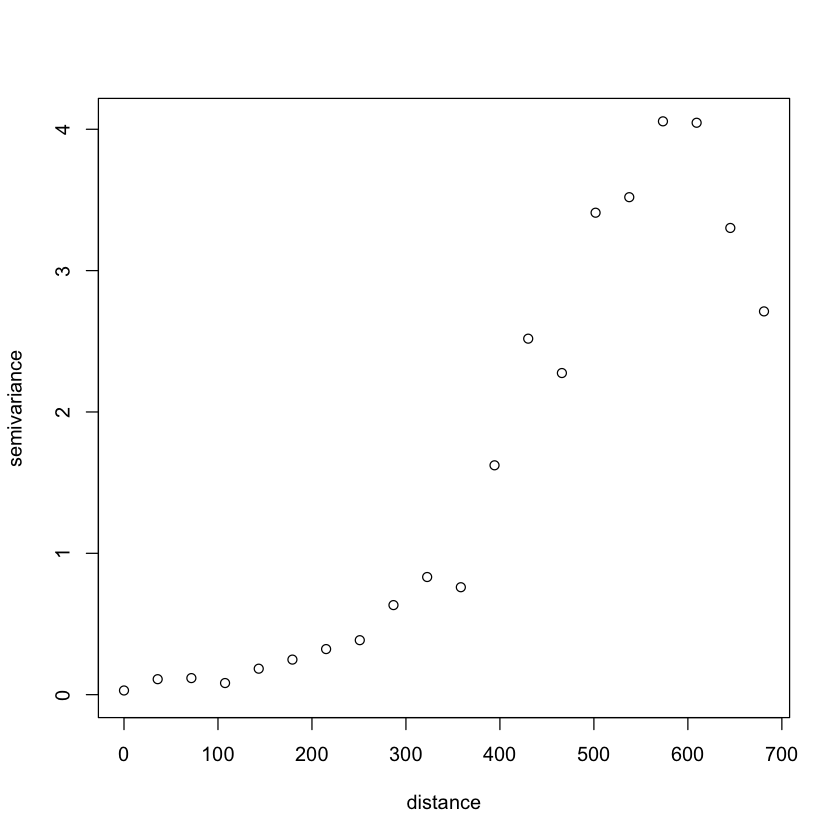

In [16]:
vario2 = variog(geo_wind, uvec=seq(0,681,l=20),
                 option="bin", estimator.type="modulus")
plot(vario2)

In [17]:
exponential_wls = variofit(vario2, ini.cov.pars=c(2.8,400), nugget=0.05,   
                      fix.nugget=F, cov.model='exponential', weights='cressie')
exponential_ml = likfit(geo_wind, ini.cov.pars=c(2.8,400), nugget=0.05,   
                     fix.nugget=F, cov.model='exponential', lik.method='ML')

variofit: covariance model used is exponential 
variofit: weights used: cressie 
variofit: minimisation function used: optim 
kappa not used for the exponential correlation function
---------------------------------------------------------------
likfit: likelihood maximisation using the function optim.
likfit: Use control() to pass additional
         arguments for the maximisation function.
        For further details see documentation for optim.
likfit: It is highly advisable to run this function several
        times with different initial values for the parameters.
likfit: WARNING: This step can be time demanding!
---------------------------------------------------------------
likfit: end of numerical maximisation.


In [18]:
gaussian_wls = variofit(vario2, ini.cov.pars=c(2.8,400), nugget=0.05,   
                      fix.nugget=F, cov.model='gaussian', weights='cressie')
gaussian_ml = likfit(geo_wind, ini.cov.pars=c(0.5,400), nugget=0.05,  
                     fix.nugget=F, cov.model='gaussian', lik.method='ML')


variofit: covariance model used is gaussian 
variofit: weights used: cressie 
variofit: minimisation function used: optim 
kappa not used for the gaussian correlation function
---------------------------------------------------------------
likfit: likelihood maximisation using the function optim.
likfit: Use control() to pass additional
         arguments for the maximisation function.
        For further details see documentation for optim.
likfit: It is highly advisable to run this function several
        times with different initial values for the parameters.
likfit: WARNING: This step can be time demanding!
---------------------------------------------------------------
likfit: end of numerical maximisation.


In [19]:
matern_wls = variofit(vario2, ini.cov.pars=c(2.8,400), nugget=0.05, kappa=0.5, fix.kappa=F, 
                      fix.nugget=F, cov.model='matern', weights='cressie')
matern_ml = likfit(geo_wind, ini.cov.pars=c(2.8,400), nugget=0.05, kappa=0.5, fix.kappa=F,   
                     fix.nugget=F, cov.model='matern', lik.method='ML')


variofit: covariance model used is matern 
variofit: weights used: cressie 
variofit: minimisation function used: optim 


Warning message in cov.spatial(g.l$u, cov.model = g.l$cov.model, kappa = kappa, :
“Infinity value in cov.spatial”Warning message in cov.spatial(g.l$u, cov.model = g.l$cov.model, kappa = kappa, :
“Infinity value in cov.spatial”Warning message in cov.spatial(g.l$u, cov.model = g.l$cov.model, kappa = kappa, :
“Infinity value in cov.spatial”Warning message in cov.spatial(g.l$u, cov.model = g.l$cov.model, kappa = kappa, :
“Infinity value in cov.spatial”Warning message in cov.spatial(g.l$u, cov.model = g.l$cov.model, kappa = kappa, :
“Infinity value in cov.spatial”Warning message in cov.spatial(g.l$u, cov.model = g.l$cov.model, kappa = kappa, :
“Infinity value in cov.spatial”Warning message in cov.spatial(g.l$u, cov.model = g.l$cov.model, kappa = kappa, :
“Infinity value in cov.spatial”Warning message in cov.spatial(g.l$u, cov.model = g.l$cov.model, kappa = kappa, :
“Infinity value in cov.spatial”Warning message in cov.spatial(g.l$u, cov.model = g.l$cov.model, kappa = kappa, :
“Infinity valu

---------------------------------------------------------------
likfit: likelihood maximisation using the function optim.
likfit: Use control() to pass additional
         arguments for the maximisation function.
        For further details see documentation for optim.
likfit: It is highly advisable to run this function several
        times with different initial values for the parameters.
likfit: WARNING: This step can be time demanding!
---------------------------------------------------------------
likfit: end of numerical maximisation.


In [20]:
get_params(exponential_wls)
get_params(gaussian_wls)
get_params(matern_wls)
get_params2(exponential_ml)
get_params2(gaussian_ml)
get_params2(matern_ml)

[[1]]
       tausq      sigmasq          phi 
2.273839e-02 6.072105e+02 1.683333e+05 

[[2]]
   value 
590.3568

[[1]]
       tausq      sigmasq          phi 
6.223095e-02 2.167032e+03 1.615992e+04 

[[2]]
   value 
181.1114

[[1]]
       tausq      sigmasq          phi        kappa 
  0.06218481 483.46664629 397.36846275  93.24990039 

[[2]]
   value 
181.5326

,status,values
beta,estimated,1.8466
tausq,estimated,0.0493
sigmasq,estimated,0.9253
phi,estimated,1235.0165
kappa,fixed,0.5000
psiA,fixed,0.0000
psiR,fixed,1.0000
lambda,fixed,1.0000


,status,values
beta,estimated,2.0016
tausq,estimated,0.0795
sigmasq,estimated,0.9658
phi,estimated,587.2472
kappa,fixed,0.5000
psiA,fixed,0.0000
psiR,fixed,1.0000
lambda,fixed,1.0000


,status,values
beta,estimated,1.8466
tausq,estimated,0.0493
sigmasq,estimated,0.9253
phi,estimated,1235.0165
kappa,estimated,0.5000
psiA,fixed,0.0000
psiR,fixed,1.0000
lambda,fixed,1.0000


In [21]:
data.frame(
    tao_sq = c(0.0227, 0.0622, 0.0622, 0.0493, 0.0795, 0.0493),
    phi = c(168333, 16160, 397.37, 1235, 587, 1235),
    sigma_sq = c(607, 2107, 483, 0.925, 0.966, 0.925),
    kappa = c('n/a', 'n/a', 93.25, 'n/a', 'n/a', 0.5),
    fit = c(590, 181, 181, 49.72, 46.47, 51.72),
    type = rep(c('SSE','AIC'), times=c(3,3)),
    row.names = c('exponential_wls', 'gaussian_wls', 'matern_wls',
                  'exponential_ml', 'gaussian_ml', 'matern_ml')
)

,tao_sq,phi,sigma_sq,kappa,fit,type
exponential_wls,0.0227,168333.00,607.000,n/a,590.00,SSE
gaussian_wls,0.0622,16160.00,2107.000,n/a,181.00,SSE
matern_wls,0.0622,397.37,483.000,93.25,181.00,SSE
exponential_ml,0.0493,1235.00,0.925,n/a,49.72,AIC
gaussian_ml,0.0795,587.00,0.966,n/a,46.47,AIC
matern_ml,0.0493,1235.00,0.925,0.5,51.72,AIC


The sills given by the WLS models are much higher than the reasonable range. Among the three ML models, the Gaussian model has the lowest AIC and the most reasonable range. We will proceed with **Gaussian ML** henceforward.

# Kriging

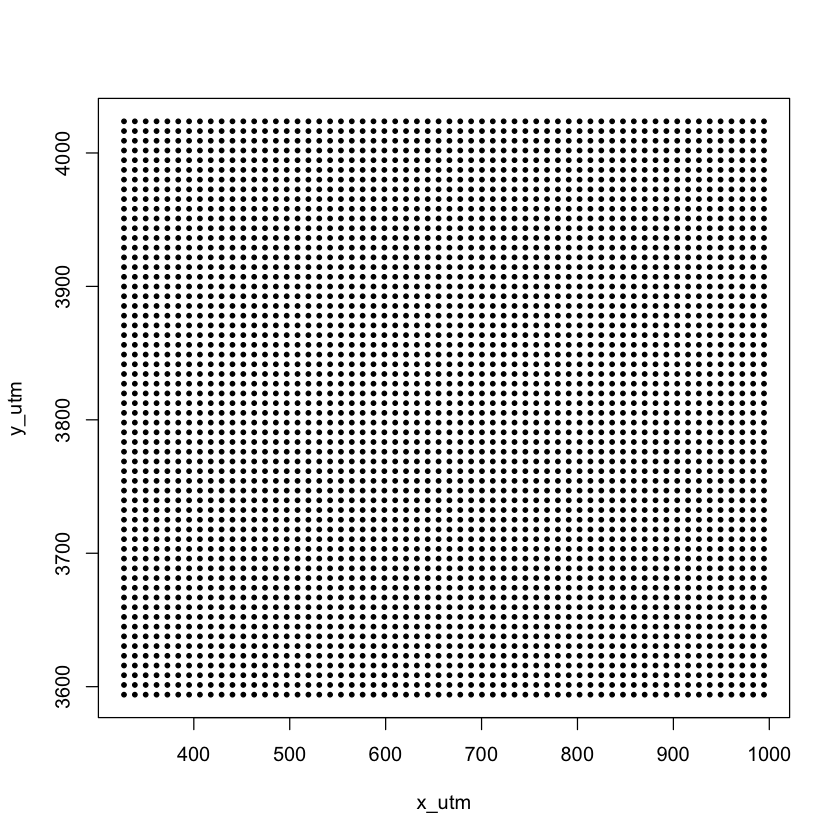

In [22]:
# 3.

res=60
xs=seq(min(storm$x_utm),max(storm$x_utm),len=res)
ys=seq(min(storm$y_utm),max(storm$y_utm),len=res)
myGrid=expand.grid(xs,ys)
names(myGrid)=c('x_utm','y_utm')
plot(myGrid, pch=19, cex=0.5)

krige.conv: model with constant mean
krige.conv: Kriging performed using global neighbourhood 


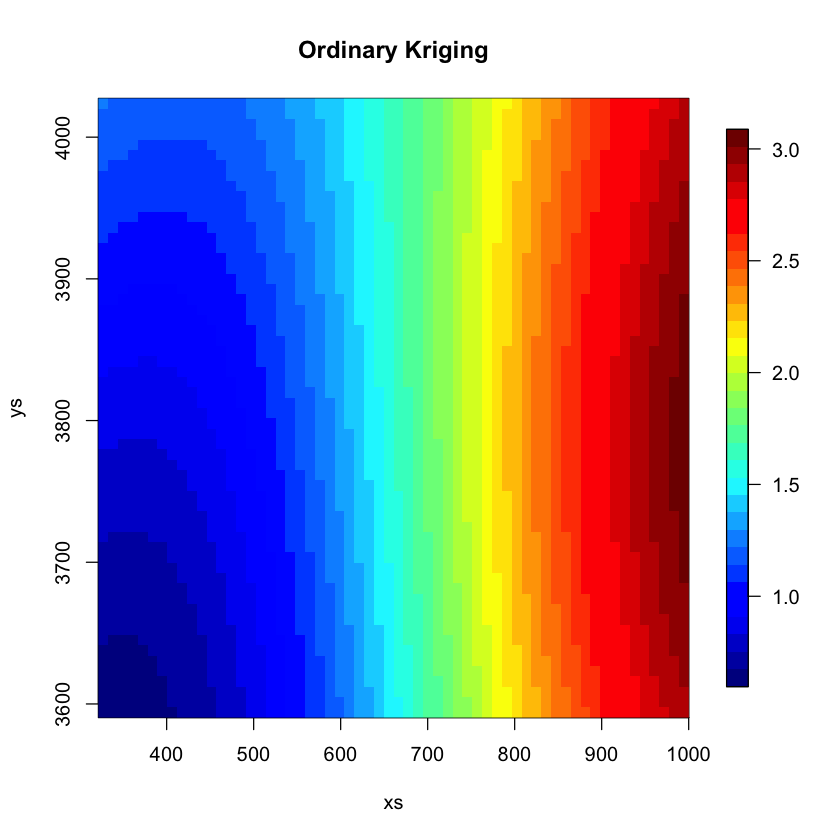

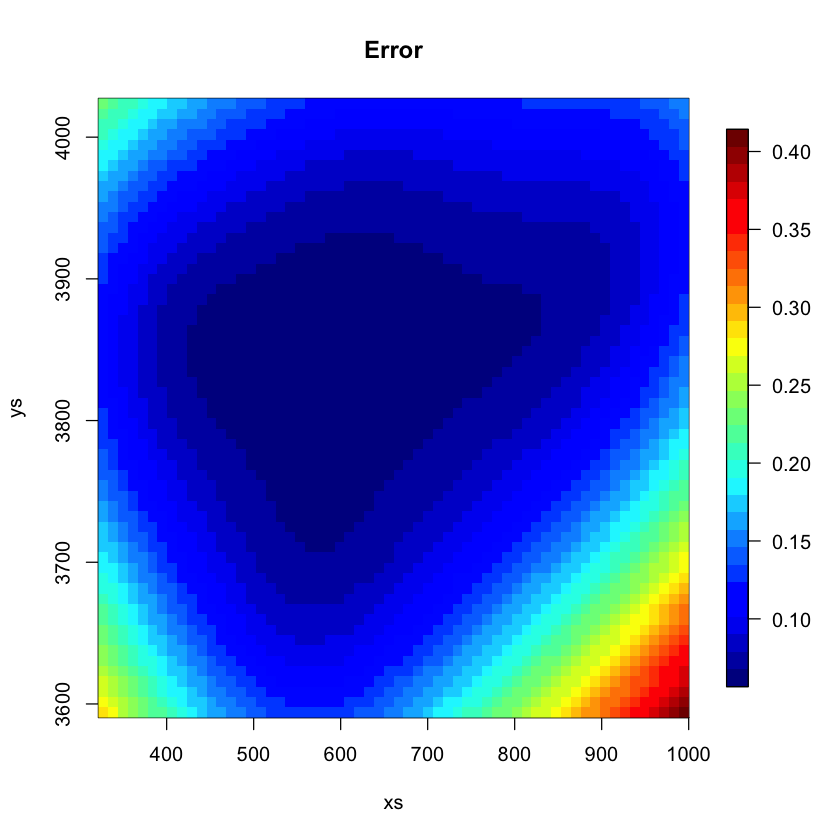

In [23]:
KCord = krige.control(type.krige='ok',obj.m=gaussian_ml)
ordinary_krige = krige.conv(geo_wind,locations=myGrid,
                            krige=KCord,output=output.control(signal=TRUE))

# plot gridded predictions
image.plot(xs,ys,matrix(ordinary_krige$predict,res,res,byrow=FALSE),col=tim.colors(32), main="Ordinary Kriging")
# plot standard errors
image.plot(xs,ys,matrix(sqrt(ordinary_krige$krige.var),res,res,byrow=FALSE),col=tim.colors(32), main="Error")

In ordinary kriging, we estimate a constant unknown mean that requires estimation from the model. Ordinary kriging also incorporates covariance structure among the outcome variables to estimate the weights accordingly. The mean (beta) is estimated to be 2.0016. The nugget, range and sill are 0.0795, 587 and 0.966 respectively.

In [24]:
# 4.

summary(lm(wind.sp~x_utm+y_utm,data=storm))
summary(lm(wind.sp~x_utm+I(x_utm^2)+y_utm+I(y_utm^2)+ I(x_utm*y_utm),data=storm))


Call:
lm(formula = wind.sp ~ x_utm + y_utm, data = storm)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0924 -1.6203 -0.4241  1.2272  8.1011 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -28.251603  12.893802  -2.191   0.0325 *  
x_utm         0.025326   0.002002  12.647   <2e-16 ***
y_utm         0.004874   0.003424   1.423   0.1600    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.72 on 58 degrees of freedom
Multiple R-squared:  0.7597,	Adjusted R-squared:  0.7514 
F-statistic: 91.69 on 2 and 58 DF,  p-value: < 2.2e-16



Call:
lm(formula = wind.sp ~ x_utm + I(x_utm^2) + y_utm + I(y_utm^2) + 
    I(x_utm * y_utm), data = storm)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3253 -0.6954  0.2777  0.9132  5.6693 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -4.806e+00  2.828e+02  -0.017    0.987    
x_utm             5.786e-02  7.937e-02   0.729    0.469    
I(x_utm^2)        6.333e-05  8.045e-06   7.872 1.41e-10 ***
y_utm            -7.662e-03  1.534e-01  -0.050    0.960    
I(y_utm^2)        3.347e-06  2.093e-05   0.160    0.874    
I(x_utm * y_utm) -2.985e-05  2.155e-05  -1.386    0.171    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.847 on 55 degrees of freedom
Multiple R-squared:  0.8949,	Adjusted R-squared:  0.8853 
F-statistic: 93.61 on 5 and 55 DF,  p-value: < 2.2e-16


In [25]:
mlfit_trend_gau = likfit(geo_wind, ini.cov.pars=c(0.5,400),
                             nugget=0.05, fix.nugget=FALSE,
                             cov.model='gaussian', lik.method='ML',
                             trend= '1st') # using the first order trend
kriged_grid_trend2=krige.conv(geo_wind,locations=myGrid,
                              krige=krige.control(obj.model=mlfit_trend_gau,
                                                  trend.d='1st',trend.l='1st'))

kappa not used for the gaussian correlation function
---------------------------------------------------------------
likfit: likelihood maximisation using the function optim.
likfit: Use control() to pass additional
         arguments for the maximisation function.
        For further details see documentation for optim.
likfit: It is highly advisable to run this function several
        times with different initial values for the parameters.
likfit: WARNING: This step can be time demanding!
---------------------------------------------------------------
likfit: end of numerical maximisation.
krige.conv: model with mean given by a 1st order polynomial on the coordinates
krige.conv: Kriging performed using global neighbourhood 


In [26]:
myGrid_ll = project(myGrid, proj_utm17, inverse=TRUE)
preds = data.frame(myGrid_ll, 
                   pred.ws=exp(kriged_grid_trend2$predict) %>% as.vector)
preds = data.frame(myGrid_ll,
                   pred.ws=ordinary_krige$predict %>% as.vector)

In [27]:
pred.pal = colorNumeric(c('darkgreen','gold1','brown'),
                             domain=preds$pred.ws)

In [28]:
wind = leaflet(preds) %>% 
addProviderTiles("CartoDB.Positron") %>% 
addCircles(lng=~x, lat=~y, color=~pred.pal(pred.ws),
         opacity=.7, fillOpacity=.7, radius=1e3) %>% 
addLegend('bottomright', pal=pred.pal, values=preds$pred.ws,
            title="Log Wind Speed (m/s)", opacity=.5)

htmlwidgets::saveWidget(wind, 'wind.html')
display_html('<iframe src="wind.html" width=100% height=450></iframe>')

In [29]:
mlfit_trend_gau

likfit: estimated model parameters:
    beta0     beta1     beta2     tausq   sigmasq       phi 
"-4.2371" " 0.0034" " 0.0009" " 0.0311" " 0.0671" "16.9876" 
Practical Range with cor=0.05 for asymptotic range: 29.40249

likfit: maximised log-likelihood = -12.37

Intercept: -4.24 \
Coefficient for x: 0.0034 \
Coefficient for y: 0.0009 \
Nugget: 0.0311 \
Sill: 0.0671 \
Range: 16.9876

In universal kriging, we don't assume that mean is estimated as a constant but we instead assume a trend in x and y. We could potentially add other spatially varying covariates as well. In addition to estimating the parameters of the spatially varying covariates, we have spatial correlation in the data that is not explained by the covariates.

# Cross Validation

In [30]:
# 5.
library(caTools)

set.seed(2019) # set seed to ensure consistent splitting
sample = sample.split(storm, SplitRatio = .7) # perform 70-30 train-test-split by creating row boolean mask
train = subset(storm, sample == TRUE)
test = subset(storm, sample == FALSE)

Warning message:
“Length of logical index must be 1 or 61, not 6”Warning message:
“Length of logical index must be 1 or 61, not 6”

In [31]:
dim(train)
dim(test)

[1] 40  6

[1] 21  6

In [32]:
geo_train = as.geodata(train, coords.col=c(5,6), data.col=4)
geo_test = as.geodata(test, coords.col=c(5,6), data.col=4)

In [33]:
mlfit_trend_gau = likfit(geo_train, ini.cov.pars=c(0.5,400),
                             nugget=0.05, fix.nugget=FALSE,
                             cov.model='gaussian', lik.method='ML',
                             trend= '1st') # using the first order trend

kappa not used for the gaussian correlation function
---------------------------------------------------------------
likfit: likelihood maximisation using the function optim.
likfit: Use control() to pass additional
         arguments for the maximisation function.
        For further details see documentation for optim.
likfit: It is highly advisable to run this function several
        times with different initial values for the parameters.
likfit: WARNING: This step can be time demanding!
---------------------------------------------------------------
likfit: end of numerical maximisation.


In [34]:
KCord = krige.control(type.krige='ok',obj.m=gaussian_ml)
ordinary_krige = krige.conv(geo_wind,locations=test %>% select(x_utm, y_utm),
                            krige=KCord,output=output.control(signal=TRUE))

krige.conv: model with constant mean
krige.conv: Kriging performed using global neighbourhood 


In [55]:
# MSE
mean((ordinary_krige$predict - test$wind.sp)^2)

# R^2
1 - sum((ordinary_krige$predict - test$wind.sp)^2) / sum((test$wind.sp - mean(test$wind.sp))^2)

[1] 3.093658

[1] 0.6386011

The MSE is found to be 3.09, while the R-squared is 0.64. Kriging performance was average.

# Spatial Regression and Interpolation

In [36]:
# 6.

storm = read_csv('dorian.csv')
storm = storm %>% 
            select(lat, lon, wind.sp)
storm %>% head()

Parsed with column specification:
cols(
  lat = col_double(),
  lon = col_double(),
  temp = col_double(),
  dew.point = col_double(),
  ceiling.ht = col_double(),
  wind.dir = col_double(),
  wind.sp = col_double(),
  atm.press = col_double(),
  rh = col_double()
)


lat,lon,wind.sp
32.483,-80.717,2.850000
32.550,-80.450,1.083333
32.782,-79.925,3.350000
32.899,-80.041,4.566667
32.900,-80.033,4.650000
33.350,-79.183,4.700000


In [37]:
proj_utm17='+proj=utm +zone=17 +north +datum=WGS84 +units=km'

newcoords = project(as.matrix(cbind(storm$lon, storm$lat)), proj=proj_utm17)
storm$x_utm = newcoords[,1]
storm$y_utm = newcoords[,2]

storm = storm %>% select(-c(lat,lon)) %>% mutate(wind.sp=log(wind.sp))
storm %>% head()

wind.sp,x_utm,y_utm
1.04731899,526.5898,3594.010
0.08004271,551.6383,3601.535
1.20896035,600.6707,3627.631
1.51878354,589.6894,3640.498
1.53686722,590.4367,3640.616
1.54756251,669.0745,3691.563


In [38]:
linear = lm(wind.sp~., data=storm)
gls_ratio = gls(wind.sp ~ ., data = storm, correlation = corRatio(form = ~ x_utm + y_utm ))
gls_gaus  = gls(wind.sp ~ ., data = storm, correlation = corGaus(form = ~ x_utm + y_utm ))
gls_spher = gls(wind.sp ~ ., data = storm, correlation = corSpher(form = ~ x_utm + y_utm ))
gam = gam(wind.sp ~ s(x_utm,y_utm), data=storm)


In [39]:
summary(linear)


Call:
lm(formula = wind.sp ~ ., data = storm)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0358 -0.1363  0.0460  0.1929  0.7945 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.7880646  1.5303732  -2.475   0.0163 *  
x_utm        0.0034605  0.0002377  14.560   <2e-16 ***
y_utm        0.0008316  0.0004064   2.046   0.0453 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3228 on 58 degrees of freedom
Multiple R-squared:  0.8104,	Adjusted R-squared:  0.8039 
F-statistic: 123.9 on 2 and 58 DF,  p-value: < 2.2e-16


In [40]:
summary(gls_ratio)
print('*************')
summary(gls_gaus)
print('*************')
summary(gls_spher)

Generalized least squares fit by REML
  Model: wind.sp ~ . 
  Data: storm 
    AIC      BIC  logLik
  67.15 77.45222 -28.575

Correlation Structure: Rational quadratic spatial correlation
 Formula: ~x_utm + y_utm 
 Parameter estimate(s):
   range 
1.571726 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept) -4.138291 1.6382734 -2.526008  0.0143
x_utm        0.003503 0.0002519 13.905633  0.0000
y_utm        0.000912 0.0004367  2.088169  0.0412

 Correlation: 
      (Intr) x_utm 
x_utm  0.203       
y_utm -0.995 -0.295

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-3.0951549 -0.4074466  0.1857235  0.6758631  2.5257664 

Residual standard error: 0.3225195 
Degrees of freedom: 61 total; 58 residual

[1] "*************"


Generalized least squares fit by REML
  Model: wind.sp ~ . 
  Data: storm 
       AIC     BIC    logLik
  67.90218 78.2044 -28.95109

Correlation Structure: Gaussian spatial correlation
 Formula: ~x_utm + y_utm 
 Parameter estimate(s):
   range 
1.686633 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept) -4.045020 1.6284966 -2.483898  0.0159
x_utm        0.003511 0.0002501 14.038909  0.0000
y_utm        0.000886 0.0004338  2.042159  0.0457

 Correlation: 
      (Intr) x_utm 
x_utm  0.200       
y_utm -0.995 -0.292

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-3.0942113 -0.3856530  0.1976411  0.6745308  2.5344311 

Residual standard error: 0.323802 
Degrees of freedom: 61 total; 58 residual

[1] "*************"


Generalized least squares fit by REML
  Model: wind.sp ~ . 
  Data: storm 
       AIC      BIC    logLik
  69.03636 79.33857 -29.51818

Correlation Structure: Spherical spatial correlation
 Formula: ~x_utm + y_utm 
 Parameter estimate(s):
   range 
5.511894 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept) -4.164263 1.6443369 -2.532488  0.0141
x_utm        0.003510 0.0002522 13.915714  0.0000
y_utm        0.000918 0.0004385  2.092941  0.0407

 Correlation: 
      (Intr) x_utm 
x_utm  0.207       
y_utm -0.995 -0.299

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-3.0802358 -0.4110597  0.1796104  0.6727354  2.5161393 

Residual standard error: 0.3238256 
Degrees of freedom: 61 total; 58 residual

All the corresponding betas are similar, and the one that assumes a rational quadratic spatial correlation give us the best fit according to the AIC.

In [41]:
summary(gam)


Family: gaussian 
Link function: identity 

Formula:
wind.sp ~ s(x_utm, y_utm)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.60653    0.03387   47.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                 edf Ref.df    F p-value    
s(x_utm,y_utm) 10.23  13.95 28.4  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.868   Deviance explained = 89.1%
GCV = 0.085769  Scale est. = 0.069982  n = 61

LM, GLS and GAM are fitting linear models with OLS, GLS and generalized additive model with smooth term respectively.

In [42]:
AIC(linear)
AIC(gam)

[1] 40.08285

[1] 22.92706

The GAM model has the lowest AIC

In [43]:
# 7.

knots = floor(nrow(storm)*0.75)
knots

[1] 45

In [44]:
gam_more = gam(wind.sp ~ s(x_utm, y_utm, k=knots), data = storm)
AIC(gam_more)

[1] 22.08159

The AIC improves slightly with more knots.

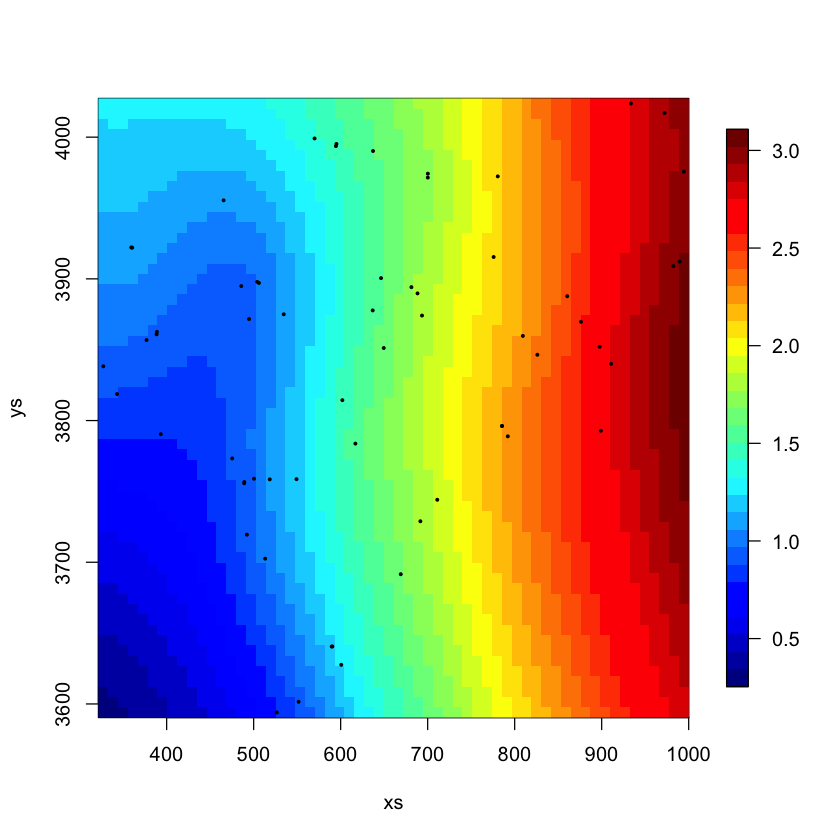

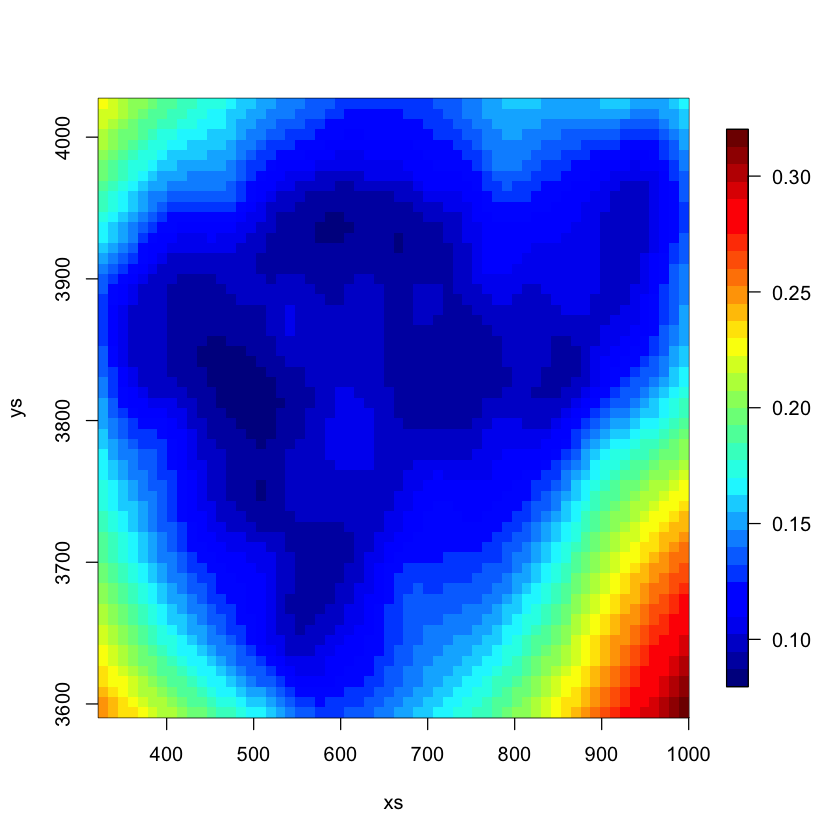

In [45]:
pred_gam = predict.gam(gam,myGrid,se.fit=TRUE)
image.plot(xs,ys,matrix(pred_gam$fit,res,res),col=tim.colors(32))
points(storm$x_utm,storm$y_utm,pch=19,cex=0.3)
image.plot(xs,ys,matrix(pred_gam$se.fit,res,res),col=tim.colors(32))

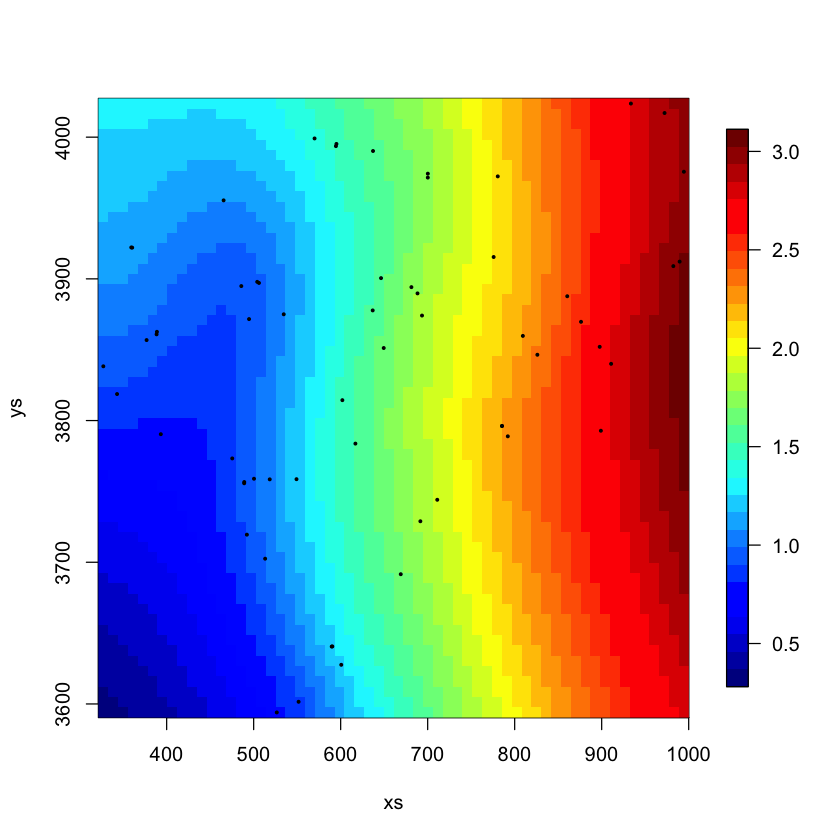

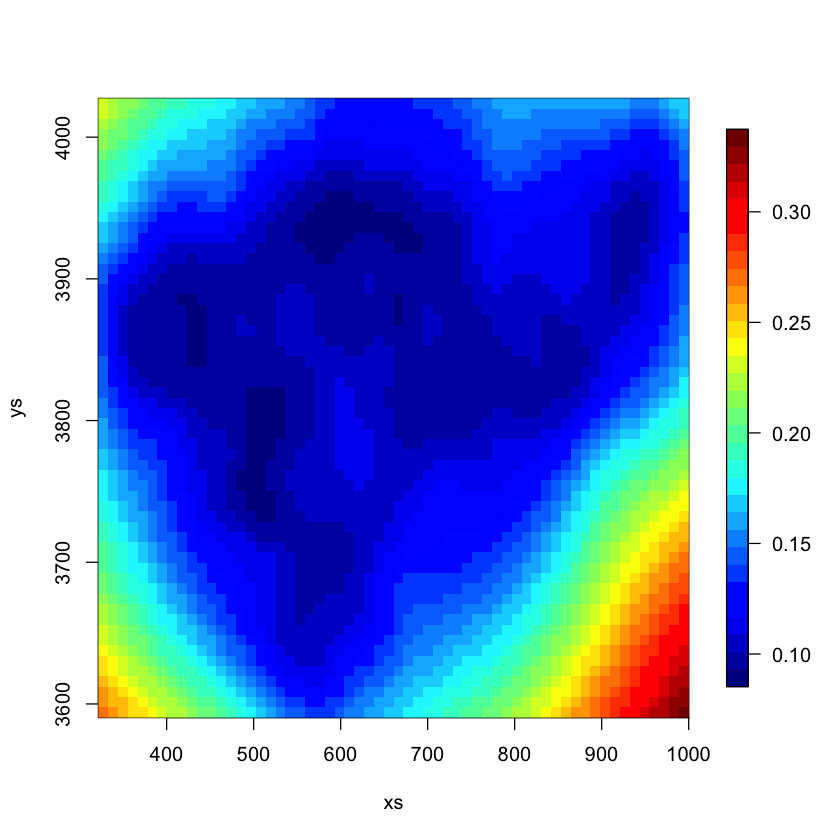

In [46]:
pred_gam_more = predict.gam(gam_more,myGrid,se.fit=TRUE)
image.plot(xs,ys,matrix(pred_gam_more$fit,res,res),col=tim.colors(32))
points(storm$x_utm,storm$y_utm,pch=19,cex=0.3)
image.plot(xs,ys,matrix(pred_gam_more$se.fit,res,res),col=tim.colors(32))

There are minimal difference in the map, as predicted from the fact that the difference between model fit is also minimal. We can't really create a map using gam models with covariates because we can't assume independence in observations for spatial data.

In [47]:
# 8.

storm$lm.res = linear$residuals
storm$gls.res = gls_ratio$residuals
storm$gam.res.more = gam_more$residuals
storm$gam.res = gam$residuals

storm %>% head

wind.sp,x_utm,y_utm,lm.res,gls.res,gam.res.more,gam.res
1.04731899,526.5898,3594.010,0.02437612,0.06364488,0.26437107,0.26131846
0.08004271,551.6383,3601.535,-1.03583726,-0.99824768,-0.81172251,-0.83957329
1.20896035,600.6707,3627.631,-0.09829607,-0.06490538,-0.03204111,-0.03381766
1.51878354,589.6894,3640.498,0.23882757,0.27165744,0.28859532,0.29635865
1.53686722,590.4367,3640.616,0.25422769,0.28701604,0.30251260,0.31045685
1.54756251,669.0745,3691.563,-0.04956835,-0.02424382,-0.11865356,-0.11544537


In [48]:
plot_resid_semi = function(datacol){
    data = as.geodata(storm,coords.col=c(2,3), data.col=datacol)
    plot(variog(data, option='cloud'))
    data_bin = variog(data,uvec=seq(0,681,l=15),option="bin")
    plot(data_bin)
}

variog: computing omnidirectional variogram
variog: computing omnidirectional variogram


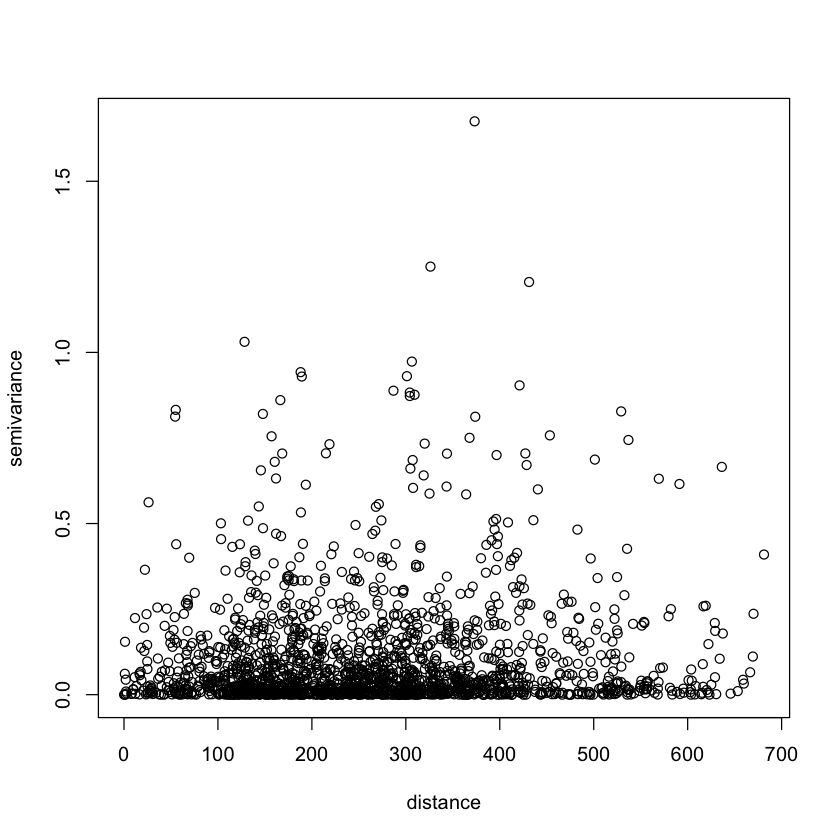

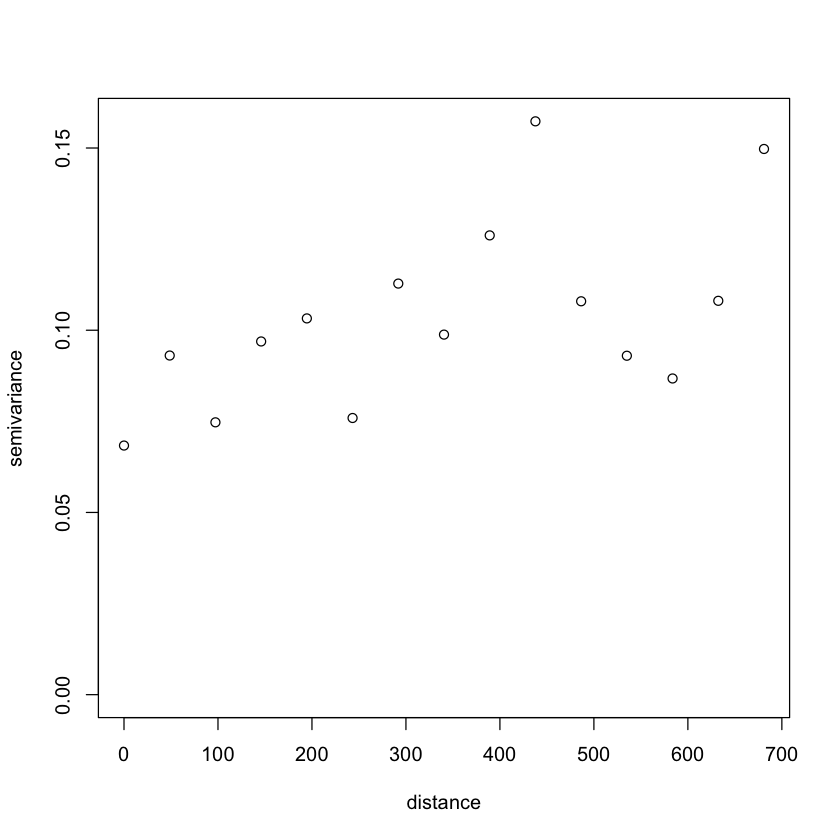

In [49]:
# Linear
plot_resid_semi(4)

variog: computing omnidirectional variogram
variog: computing omnidirectional variogram


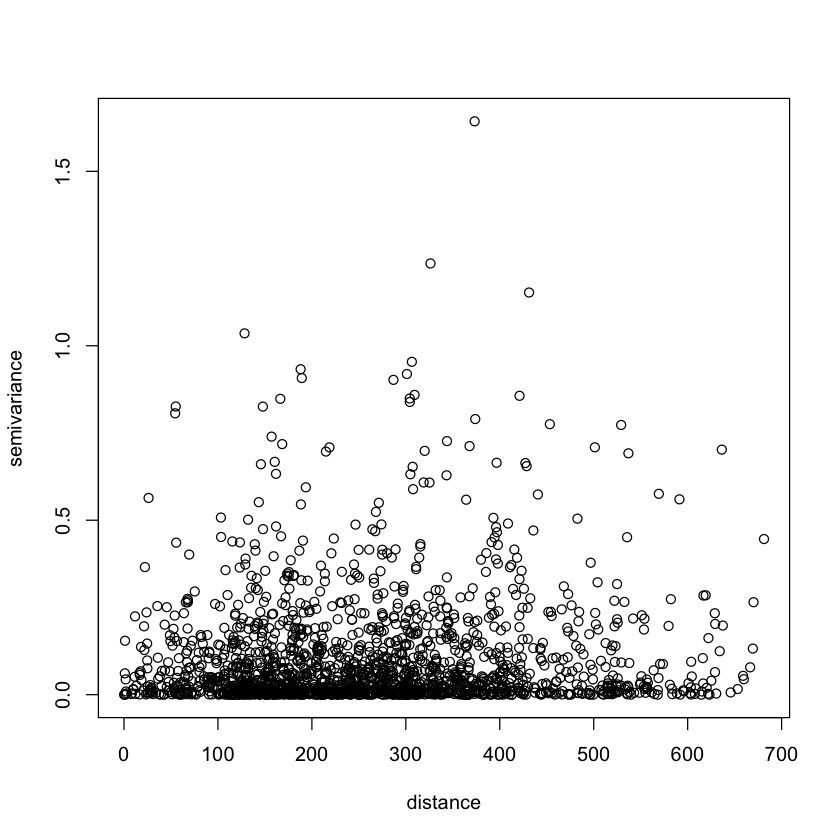

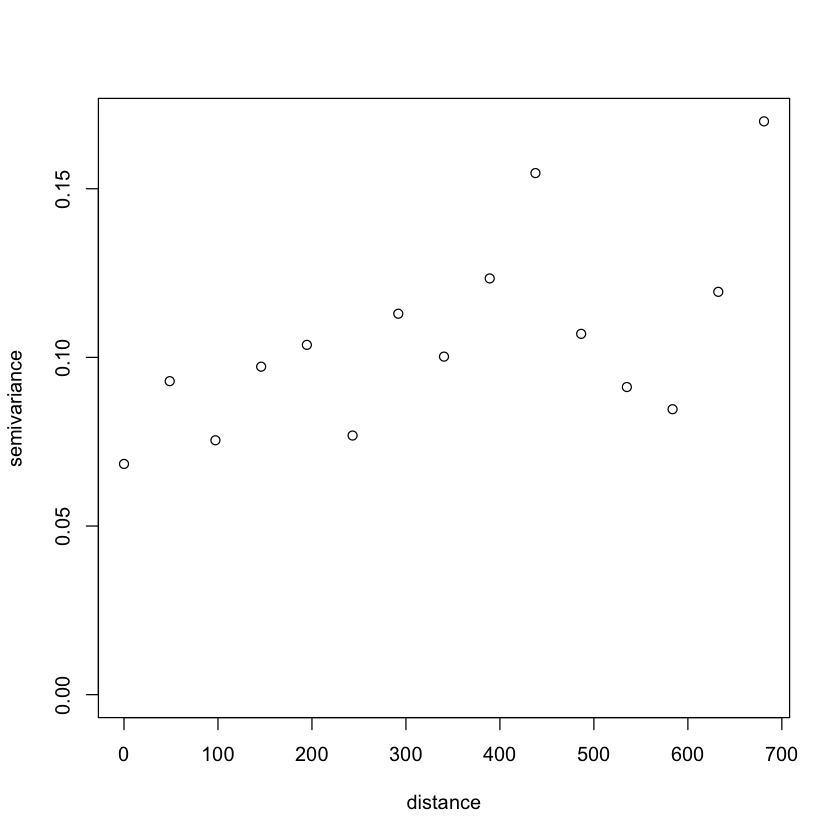

In [50]:
# gls
plot_resid_semi(5)

variog: computing omnidirectional variogram
variog: computing omnidirectional variogram


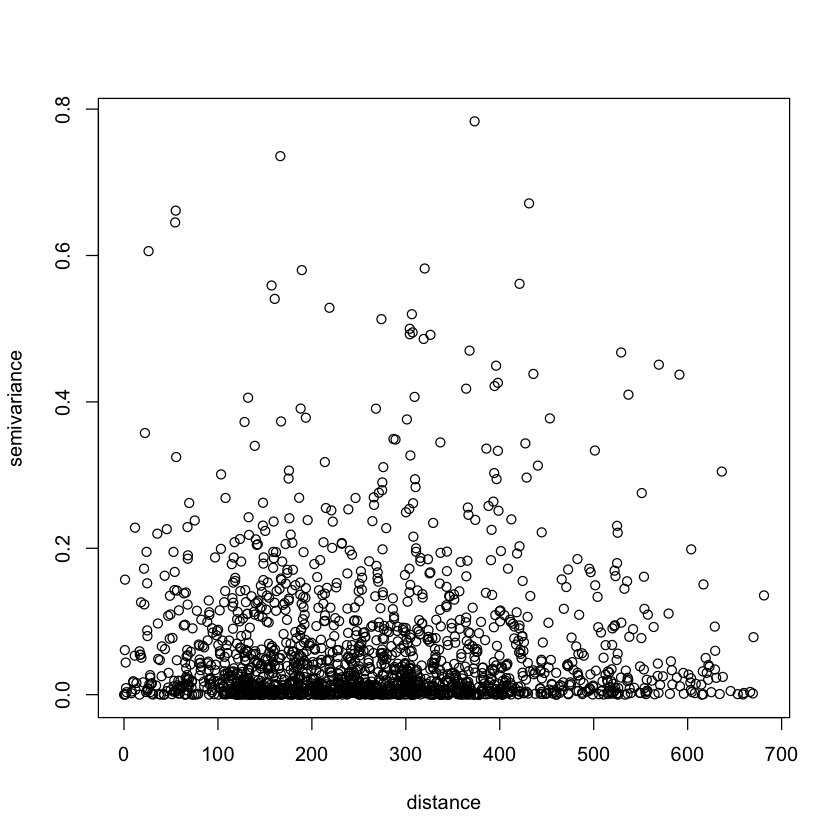

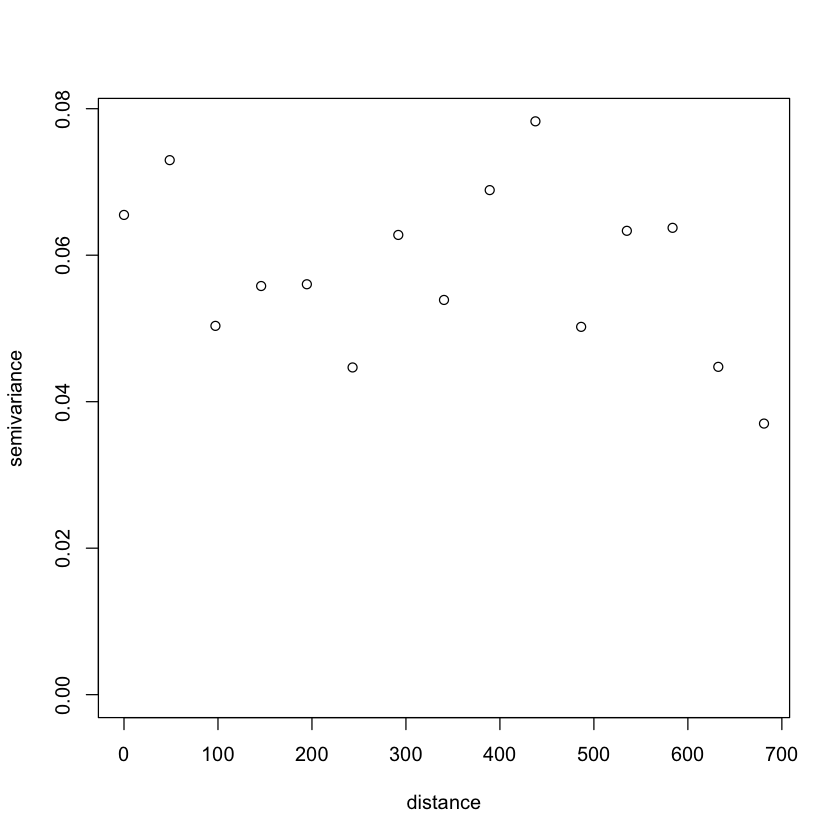

In [51]:
# gam with fewer knots

plot_resid_semi(7)

variog: computing omnidirectional variogram
variog: computing omnidirectional variogram


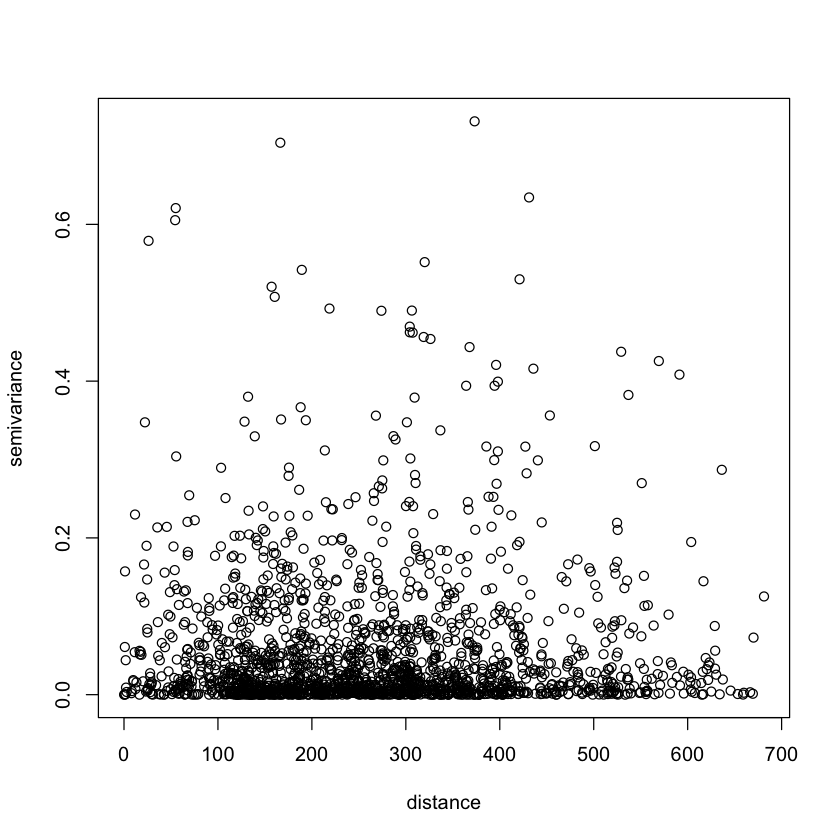

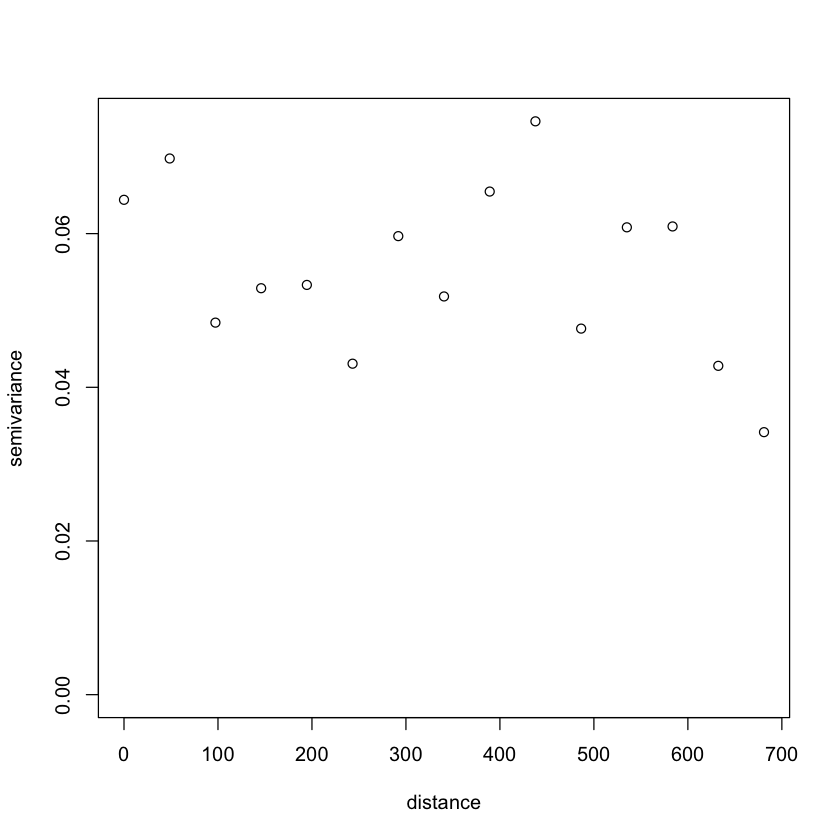

In [52]:
# gam with more knots

plot_resid_semi(6)

Both glm and ls residuals indicate the lack of independence between observations through the observed ascending trend. While gam residuals exhibit a random-walk like pattern.

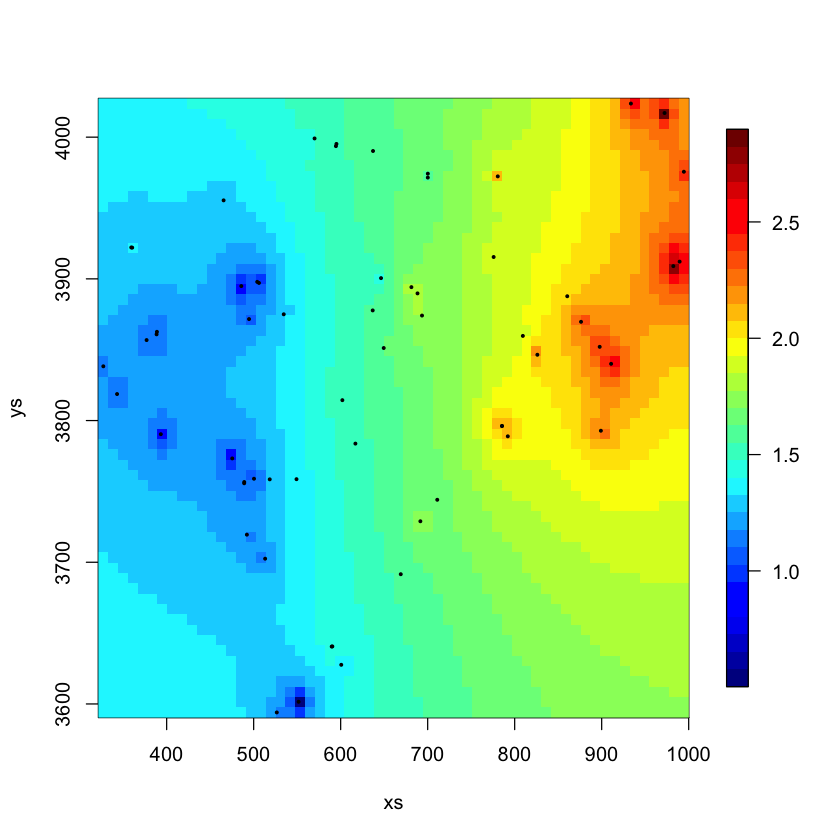

In [53]:
# 9.

idw=function(data,locs,newlocs,p){
  dists=rdist(newlocs,locs)
  return(((dists^(-p))%*%data)/((dists^(-p))%*%rep(1,length(data)))) 
}

idwPred1=idw(storm$wind.sp,cbind(storm$x_utm,storm$y_utm),myGrid,p=1)
idwPred10=idw(storm$wind.sp,cbind(storm$x_utm,storm$y_utm),myGrid,p=10)

image.plot(xs,ys,matrix(idwPred1,res,res),col=tim.colors(32))
points(storm$x_utm,storm$y_utm,pch=19,cex=0.3)

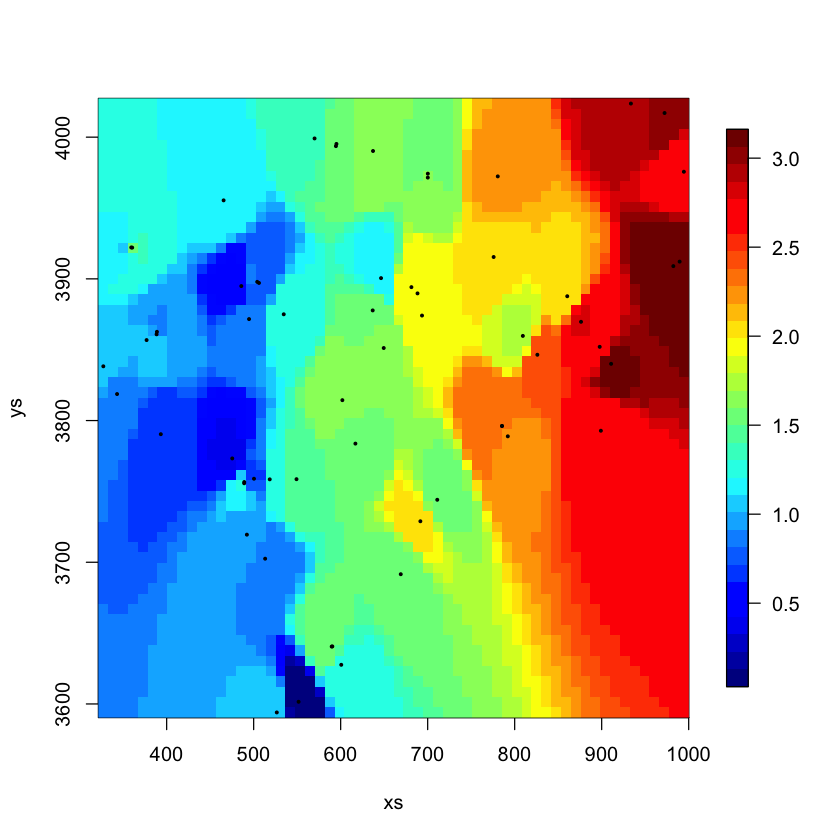

In [54]:
image.plot(xs,ys,matrix(idwPred10,res,res),col=tim.colors(32))
points(storm$x_utm,storm$y_utm,pch=19,cex=0.3)

A larger p relates to a more localized weighting, and small p is smoother, as indicated on the above graphs.

* +: Easy to interpret
* +: Good exploratory tool when number of observations is relatively small
* -: No statistical estimation that gives standard errors for our predictions